<a href="https://colab.research.google.com/github/thravt/AIProjectsHomework/blob/main/HW5_Task2_Tyler_Thraves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1 (7 points): Variational Autoencoder (VAE): Here is a complete implementation of a VAE in TensorFlow: https://www.tensorflow.org/tutorials/generative/cvae**

**Following these steps try generating images using the same encoder-decoder architecture using a different Image dataset (other than MNIST).**

Setup

In [ ]:
! pip install tensorflow-probability

# to generate gifs
! pip install imageio
! pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-fbwj_82i
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-fbwj_82i
  Resolved https://github.com/tensorflow/docs to commit a81ff2e4ebf518b45cad643d88063c6f2b9e5a1e
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2025.3.6.10029-py3-none-any.whl size=186351 sha256=06db22662b86c29fc7e12e10a4c08269b8739a6b4f1f395c400043df0c8c08db
  Stored in directory: /tmp/pip-ephem-wheel-cache-qve_2amg/wheels/34/53/89/3db54cf97ce0f0261aaab3fdc12a847ea0879d34edf373e2c5
Successfully built tensorflow-docs


In [ ]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [ ]:
import pandas as pd

I'll load the mnist dataset to get a sense of what the data is supposed to look like, but I won't actually use it.

In [ ]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_images.shape)

(60000, 28, 28)


Now that I know the data's already in a matrix format, I'll download the same data from task 1 and convert it to the correct format.

In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 99% 383M/385M [00:04<00:00, 55.9MB/s]
100% 385M/385M [00:04<00:00, 93.7MB/s]


In [ ]:
! unzip cards-image-datasetclassification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/jack of spades/059.jpg  
  inflating: train/jack of spades/060.jpg  
  inflating: train/jack of spades/061.jpg  
  inflating: train/jack of spades/062.jpg  
  inflating: train/jack of spades/063.jpg  
  inflating: train/jack of spades/064.jpg  
  inflating: train/jack of spades/065.jpg  
  inflating: train/jack of spades/066.jpg  
  inflating: train/jack of spades/067.jpg  
  inflating: train/jack of spades/068.jpg  
  inflating: train/jack of spades/069.jpg  
  inflating: train/jack of spades/070.jpg  
  inflating: train/jack of spades/071.jpg  
  inflating: train/jack of spades/072.jpg  
  inflating: train/jack of spades/073.jpg  
  inflating: train/jack of spades/074.jpg  
  inflating: train/jack of spades/075.jpg  
  inflating: train/jack of spades/076.jpg  
  inflating: train/jack of spades/077.jpg  
  inflating: train/jack of spades/078.jpg  
  inflating: train/jack of spades/079.jpg  
  inflating: train/jack o

In [ ]:
dataframe = pd.read_csv('cards.csv')
dataframe = dataframe.drop('class index', axis = 1)
dataframe = dataframe.drop('labels', axis = 1)
dataframe = dataframe.drop('data set', axis = 1)
indices_to_drop = dataframe[dataframe['filepaths'].str.contains('output')].index
dataframe = dataframe.drop(indices_to_drop)
indices_to_drop = dataframe[dataframe['filepaths'].str.contains('joker')].index
dataframe = dataframe.drop(indices_to_drop)
Xlinks = dataframe.drop('card type', axis = 1).values

In [ ]:
print(Xlinks)

[['train/ace of clubs/001.jpg']
 ['train/ace of clubs/002.jpg']
 ['train/ace of clubs/003.jpg']
 ...
 ['valid/two of spades/3.jpg']
 ['valid/two of spades/4.jpg']
 ['valid/two of spades/5.jpg']]


In [ ]:
from PIL import Image

In [ ]:
size = (28, 28)

In [ ]:
X = np.zeros((len(Xlinks), np.array(Image.open(Xlinks[0][0]).resize(size).convert("L")).shape[0], np.array(Image.open(Xlinks[0][0]).resize(size).convert("L")).shape[1]))

In [ ]:
for i in range (len(X)):
  X[i] = np.array(Image.open(Xlinks[i][0]).resize(size).convert("L"))

In [ ]:
print(X[0])
print(X.shape)

[[255. 255. 255. 255. 157.  48. 149.  96.  45.  49.  41.  47.  58. 127.
  235. 231. 234. 237. 239. 240. 241. 246. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 211.  55.  85. 192. 223. 203. 206. 210. 221. 231. 236.
  235. 235. 237. 239. 241. 243. 244. 246. 254. 255. 255. 255. 255. 255.]
 [255. 253. 251. 220. 233. 252. 246. 241. 242. 241. 243. 245. 244. 242.
  242. 242. 243. 243. 244. 245. 247. 247. 253. 255. 255. 255. 255. 255.]
 [255. 252. 250. 137. 214. 250. 244. 243. 242. 241. 242. 244. 245. 244.
  245. 245. 246. 247. 247. 248. 248. 248. 252. 255. 255. 255. 255. 255.]
 [255. 255. 251. 124. 129. 241. 246. 244. 243. 243. 244. 245. 251. 253.
  253. 249. 247. 248. 248. 248. 249. 249. 248. 251. 255. 255. 255. 255.]
 [255. 230. 202. 173. 207. 238. 244. 243. 243. 243. 244. 248. 190. 136.
  151. 220. 252. 247. 247. 247. 247. 248. 204. 201. 248. 255. 255. 255.]
 [255. 137. 103. 253. 138. 192. 240. 241. 242. 243. 250. 160.  34.  29.
   30.  58. 199. 253. 246. 244. 244. 247. 171. 157. 225. 2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, _, _ = train_test_split(X, np.zeros(X.shape[0]), test_size=0.15, random_state=64)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6824, 28, 28)
(1205, 28, 28)


The data is now formatted the same way as in the tutorial.

In [ ]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(X_train)
test_images = preprocess_images(X_test)

In [ ]:
train_size = 6824
batch_size = 32
test_size = 1205

In [ ]:
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

In [ ]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Training

In [ ]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

Epoch: 10, Test set ELBO: -245.0887908935547, time elapse for current epoch: 9.631629228591919


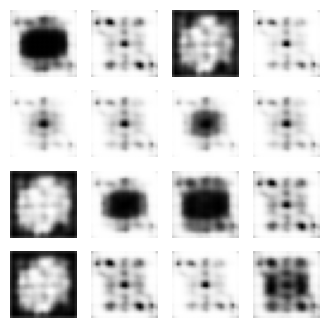

In [ ]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)

Display generated image from last training epoch

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

(-0.5, 399.5, 399.5, -0.5)

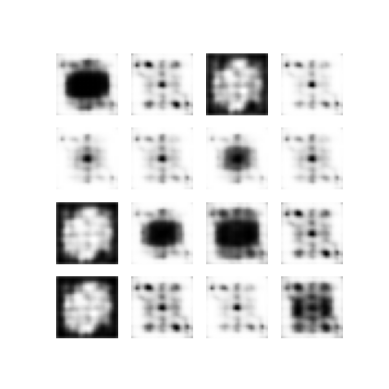

In [ ]:
plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

Display an animated GIF of all the saved images

In [ ]:
anim_file = 'cvae.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-28-a6dbd3b71488>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-28-a6dbd3b71488>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



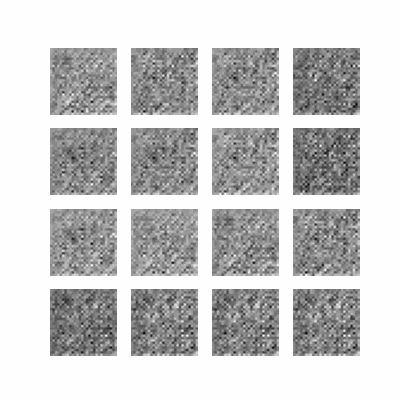

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

Display a 2D manifold of digits from the latent space

In [ ]:
def plot_latent_images(model, n, digit_size=28):
  """Plots n x n digit images decoded from the latent space."""

  norm = tfp.distributions.Normal(0, 1)
  grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
  grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
  image_width = digit_size*n
  image_height = image_width
  image = np.zeros((image_height, image_width))

  for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      z = np.array([[xi, yi]])
      x_decoded = model.sample(z)
      digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
      image[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit.numpy()

  plt.figure(figsize=(10, 10))
  plt.imshow(image, cmap='Greys_r')
  plt.axis('Off')
  plt.show()

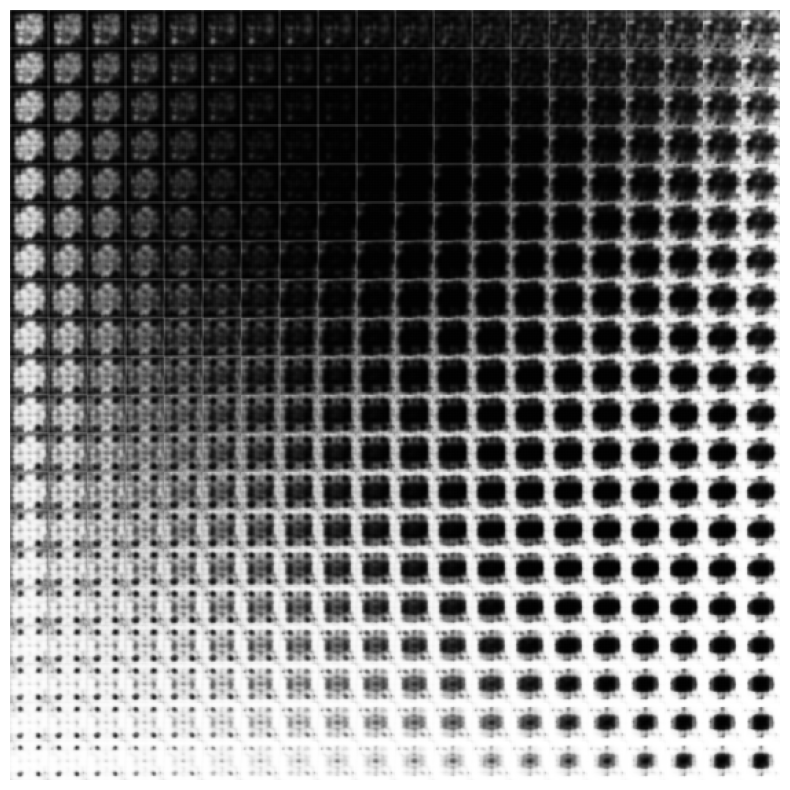

In [ ]:
plot_latent_images(model, 20)

Ok, this probably wasn't the best dataset to use for this task, as the cards may look too similar to be differentiated between at this small of a size. For better or for worse, the images do look like cards on the 10th epoch, with how they have the distinct dots, so that's good. I'll print a few cards from the training set to see what they look like.

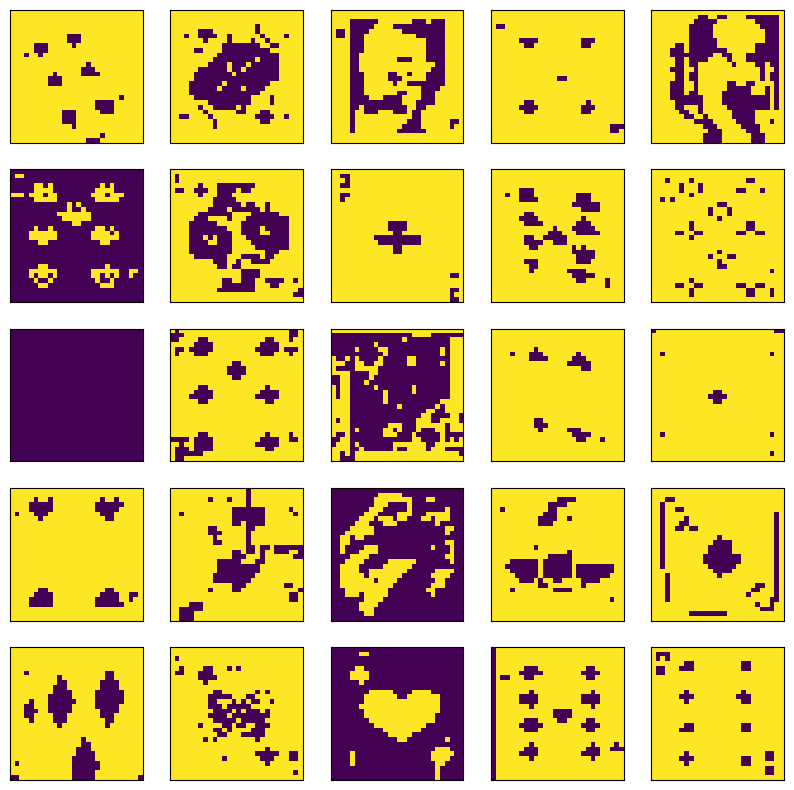

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

Ok, yeah. Probably not the best dataset to use, but I figured I should use the same one as task 1. I'm guessing it might also make things hard for GAN, but I think I should probably use the same dataset as previous parts.

**Part 2 (8 points): Generative Adversarial Networks (GANs): Repeat part 1 (use same
dataset) and implement a GAN model to generate high quality synthetic images. You
may follow steps outlined here: https://www.tensorflow.org/tutorials/generative/dcgan**

Setup

In [ ]:
dataframe = pd.read_csv('cards.csv')
dataframe = dataframe.drop('class index', axis = 1)
dataframe = dataframe.drop('labels', axis = 1)
dataframe = dataframe.drop('data set', axis = 1)
indices_to_drop = dataframe[dataframe['filepaths'].str.contains('output')].index
dataframe = dataframe.drop(indices_to_drop)
indices_to_drop = dataframe[dataframe['filepaths'].str.contains('joker')].index
dataframe = dataframe.drop(indices_to_drop)
Xlinks = dataframe.drop('card type', axis = 1).values

In [ ]:
from PIL import Image

In [ ]:
size = (28, 28)

In [ ]:
X = np.zeros((len(Xlinks), np.array(Image.open(Xlinks[0][0]).resize(size).convert("L")).shape[0], np.array(Image.open(Xlinks[0][0]).resize(size).convert("L")).shape[1]))

In [ ]:
for i in range (len(X)):
  X[i] = np.array(Image.open(Xlinks[i][0]).resize(size).convert("L"))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_images, _, train_labels, _ = train_test_split(X, np.zeros(X.shape[0]), test_size=0.15, random_state=64)

In [ ]:
import tensorflow as tf

In [ ]:
# To generate GIFs
! pip install imageio
! pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-8wi11dy8
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-8wi11dy8
  Resolved https://github.com/tensorflow/docs to commit a81ff2e4ebf518b45cad643d88063c6f2b9e5a1e
  Preparing metadata (setup.py) ... done


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
print(train_images.shape)

(6824, 28, 28, 1)


In [ ]:
BUFFER_SIZE = 6824
BATCH_SIZE = 32

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Making generator:

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Untrained test:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


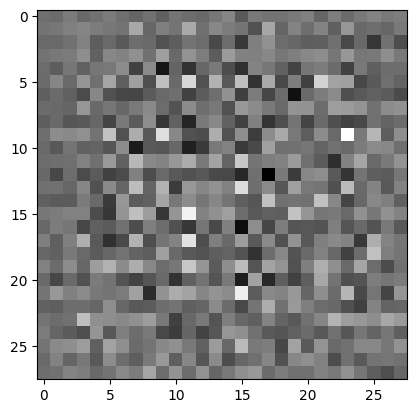

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

Making discriminator:

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Untrained test:

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00097222]], shape=(1, 1), dtype=float32)


Defining loss and optimizers:

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

Discriminator loss:

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

Generator loss:

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

Saving checkpoints:

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

Training loop:

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

Training the model:

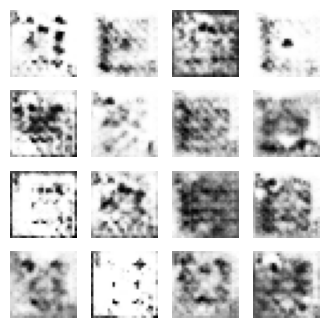

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Creating gif

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

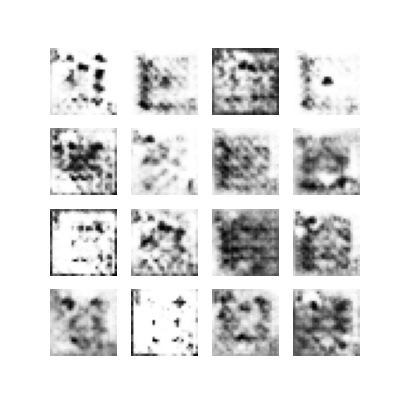

In [ ]:
display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-39-56bb6d34be2e>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-39-56bb6d34be2e>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



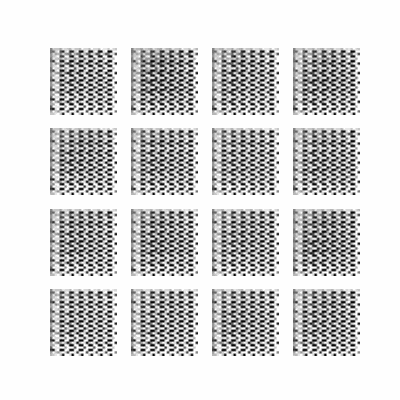

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

The images do appear to be vaugely card-like, so the model itself seems to have worked, I just don't think the resizing was too good for this image set. I will say that the GAN images look oddly shiny, while the VAE images look a bit fuzzier.